###### Linear Regression with manually added polynomial features hypothesis that can be altered

## Import Libraries

In [18]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

## Get Data

In [19]:
# Using Pandas library to import data into a dataframe
points = pd.read_csv(r"C:\Users\tiger\Downloads\house_data_complete.csv",parse_dates=['date'])

In [20]:
# Visualizing first few rows of the dataset
points.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Prepare Data

In [21]:
# Dropping NANs
points=points.dropna()

In [22]:
def ziparea(zipcode):

    if zipcode <= 98033:

        return 'Area1'

    elif zipcode>98033 and zipcode <= 98065:

        return 'Area2'

    elif zipcode>98065 and zipcode<=98118:

        return 'Area3'

    elif zipcode>98118 and zipcode<=98199:

        return 'Area4'

In [23]:
# Creating new features
points['Area'] = points['zipcode'].apply(lambda x:ziparea(x))
points['year_sold'] = pd.DatetimeIndex(points['date']).year

In [24]:
# Removing unwanted features
del points['id']
del points['zipcode']
del points['date']

In [25]:
flag=1
# Indepedent matrix of features
X = np.array([  points['view'], points['Area'],points['lat'], points['long'], points['year_sold'], points['sqft_living15'], points['bathrooms'], points['floors'], points['bedrooms'], points['sqft_above'],points['sqft_basement'], points['yr_built'], points['sqft_lot'], points['sqft_living'], points['grade'] , points['sqft_living']*points['grade'] , points['grade']**2, points['grade']*points['floors'] ]) # Can take any number of numerical features  
X = X.T
# Dependent matrix of features
y = points.iloc[:, 0].values   
y= np.reshape(y,(len(y),1))
if sum(X.shape)==len(X):

    flag=0

    X= np.reshape(X,(len(y),1))

    X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)

In [26]:
# Encoding categorical data
# Encoding the Independent Variable
# Encoding Categorical data to make the model able to deal with it
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

# Avoiding dummy variable trap

X=X[:,1:]

In [27]:
# Feature scaling
for i in range(3,X.shape[1]):
    X[:,i] = (X[:,i]-np.mean(X[:,i]))/(np.std(X[:,i]))
y[:,0] = y[:,0]/np.mean(y[:,0])
# Adding bias term
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# vector of optimized parameters
theta = np.zeros([1,X.shape[1]]) 

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train= np.reshape(y_train,(len(y_train),1))

In [29]:
''' Function to compute value of squared error between hypothesis and target values'''
def fn_cost(X,y,theta):

    error= (np.dot(X,np.transpose(theta)) - y)**2

    error_r = 1/(2*(len(X)))*np.sum(error)

    return error_r

In [30]:
''' Function that optimizes model parameters for minimal error using gradient descent algorithm''' 

def gradientDescent(X,y,theta,learning_rate):

    cost = []

    i=-1

    o_error= (np.dot(X,np.transpose(theta)) - y)**2

    o_error = np.sum(o_error)

    while True:

        i+=1

        grad = 1/len(X) * np.sum(X * (np.dot(X,np.transpose(theta)) - y), axis=0)

        theta = theta - learning_rate*grad

        cost.append(fn_cost(X,y,theta))

        error= (np.dot(X,np.transpose(theta)) - y)**2

        error = np.sum(error)

        if abs(error-o_error)<0.0001:

            break

        o_error=error

    return theta,cost,i+1

In [31]:
''' Function that uses normal equation for getting optimized model parameters'''

def normeq(X,y):
    theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta_best

In [32]:
def predictor(opt_theta,X):
    return np.dot(X,np.transpose(opt_theta))

In [33]:
#learning rate
learning_rate = 0.01

In [34]:
# Calling gradient descent fn which return -> optimized parameters, cost vector, and iterations
g,cost,iters = gradientDescent(X_train,y_train,theta,learning_rate)
print('Optimized thetas using gradient descent ->',g)

Optimized thetas using gradient descent -> [[ 1.05512547 -0.01342147 -0.05238186 -0.17213009  0.10366808  0.15262271
  -0.04918008  0.02238905  0.0312664   0.08111466  0.13274184 -0.01612314
  -0.26261564 -0.13123277 -0.14181221 -0.00659058 -0.3000193   0.07567644
   1.08240076 -0.1126641  -0.12908594]]


In [35]:
# Calling norm eq fn which return optimized parameters
theta_norm = normeq(X_train,y_train)
print('Optimized thetas using norm eq ->', theta_norm.T)

Optimized thetas using norm eq -> [[ 1.27537875e+00 -5.95336281e-01 -8.01646537e-02 -5.09372881e-01
   1.25431476e-01  2.13590561e-01 -2.13352528e-01  2.04411366e-02
   9.59648187e-03  3.84842405e-01 -1.91750131e-02 -1.01081573e-02
  -1.50361789e+01 -8.41026771e+00 -1.43429967e-01 -6.42080230e-03
   1.58916209e+01  2.35542740e-01  1.21458802e+00 -3.17384946e-01
  -1.15182196e-01]]


In [40]:
model_acc_train = fn_cost(X_train,y_train,g)
print('Model mse(train)-> ', model_acc_train)

Model mse(train)->  0.06053394036803668


In [41]:
model_acc_test = fn_cost(X_test,y_test,g)
print('Model mse(test)-> ', model_acc_test)

Model mse(test)->  0.07629045550824338


In [42]:
# computing final error for model parameters using norm eq
error_finale_norm = fn_cost(X_train,y_train,theta_norm.T)
print('Model erorr: norm eq (train)->' , error_finale_norm)

Model erorr: norm eq (train)-> 0.15422094188414998


In [43]:
model_acc_norm_test = fn_cost(X_test,y_test,theta_norm.T)
print('Model erorr : norm eq (test)->' , model_acc_norm_test )

Model erorr : norm eq (test)-> 0.16963913318714305


In [44]:
y_pred_test = predictor(g,X_test)

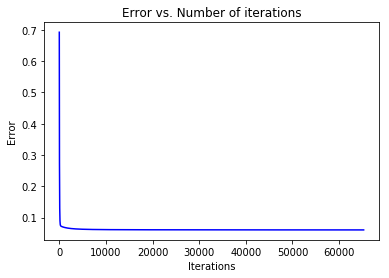

In [46]:
### Plot
from sklearn import metrics
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'b')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Error')  
ax.set_title('Error vs. Number of iterations') 
r2_test = metrics.r2_score(y_test, y_pred_test)

In [47]:
print('r-squared ->', r2_test) # the higher the better

r-squared -> 0.7055954000818396
